# Phishing Detection - Introduction

<img src="https://i.ibb.co/tpfBwpN/dataset-cover.jpg" alt="Phishing Detection" />

In this notebook, we will develop a model to train on a large dataset of email text for phishing detection. And assess its performance and examine its result on new data.

# 1) Get Started

We import an essential libraries that can use for our manipulation, analysis and visualization. And we load a dataset of email texts.

##### `Import essential library`

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

##### `Load dataset`

In [29]:
loaded_dataset = pd.read_csv('Phishing_Email.csv')

##### `Reading a data`

In [30]:
loaded_dataset.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [31]:
loaded_dataset.tail()

,Unnamed: 0,Email Text,Email Type
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18646,18647,request submitted : access request for anita ....,Safe Email
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,18649,press clippings - letter on californian utilit...,Safe Email
18649,18650,empty,Phishing Email


In [32]:
loaded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


# 2) Data pre-processing

To prepare our dataset we need to check the missing values, duplicate values and remove them before the further analysis and training.

##### `Check for missing values`

In [33]:
loaded_dataset.isnull().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

##### `Check for duplicate values`

In [34]:
loaded_dataset.duplicated().sum()

0

The dataset are no duplicate values therefore there are 16 missing values. We need to remove the missing values.

In [35]:
loaded_dataset.dropna(inplace=True)

loaded_dataset.isnull().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

# 3) Exploratory Analysis

We need to visualize our dataset variables to gain insight before feeding it into a model.

##### `Pie chart visualization`

We will use the pie chart to compare the data of Safe Type and Phishing Type.

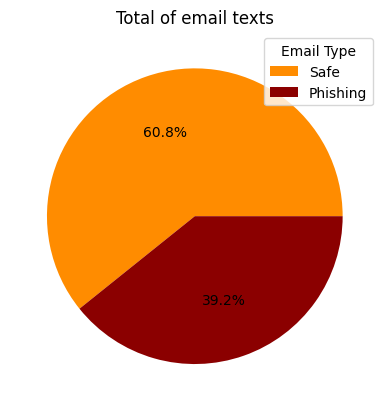

In [36]:
email_type = loaded_dataset['Email Type'].value_counts()

# Pie chart
plt.pie(email_type, colors=['darkorange', 'darkred'], autopct='%1.1f%%')
plt.title('Total of email texts')
plt.legend(['Safe', 'Phishing'], title='Email Type')
plt.show()

We've chosen the variable Email Type from the dataset. And we observe that a dataset might be imbalance due to a Safe Type is greater in data compared to the Phishing Type.

##### `Wordcloud visualization`

We will use the wordcloud to visualized the two types of email texts.

In [37]:
# Select the safe type and phishing type data
safe_type = loaded_dataset[loaded_dataset['Email Type'] == 'Safe Email']['Email Text'].values
phishing_type = loaded_dataset[loaded_dataset['Email Type'] == 'Phishing Email']['Email Text'].values

In [38]:
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='hot')

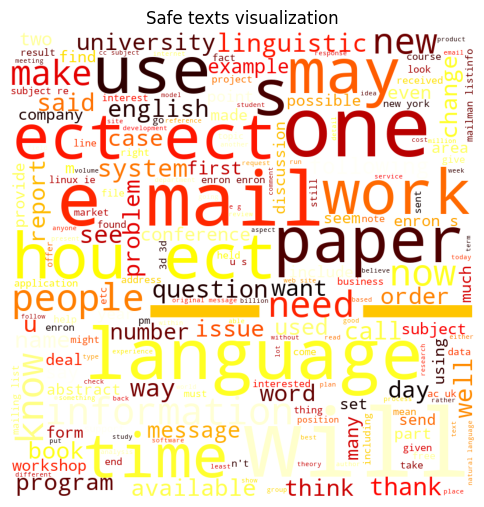

In [96]:
safe_type = ''.join(safe_type)
wordcloud.generate(safe_type)

plt.figure(figsize=(6, 7))
plt.imshow(wordcloud)
plt.title('Safe texts visualization')
plt.axis("off")
plt.show()

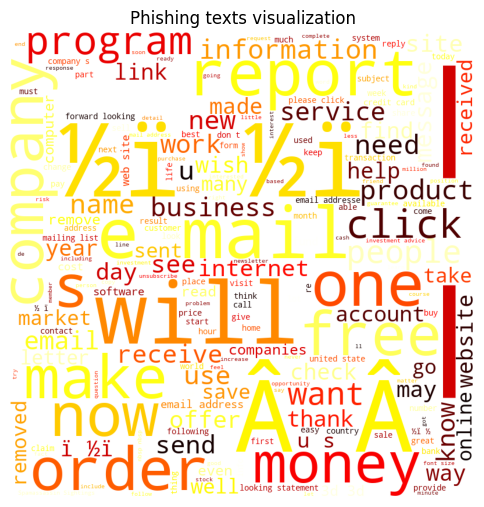

In [97]:
phishing_type = ''.join(phishing_type)
wordcloud.generate(phishing_type)

plt.figure(figsize=(6, 7))
plt.imshow(wordcloud)
plt.title('Phishing texts visualization')
plt.axis("off")
plt.show()

Here we can see the difference between the two email texts.

# 4) Model

Its time to develop our model and train our text data. We chooce the 3 naive bayes algorithm to use for our needs and compare there performance.

In [39]:
from sklearn.naive_bayes import ComplementNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [41]:
# Convert the label
loaded_dataset['Email Type'] = loaded_dataset['Email Type'].replace({'Safe Email': 1, 'Phishing Email': -1})

##### `Model performance`

We need to assess the model performance to determine its accuracy, precession, recall, f1 and matrix.

In [42]:
models = [ComplementNB(), BernoulliNB(), MultinomialNB()]
model_names = ['ComplementNB', 'BernoulliNB', 'MultinomialNB']

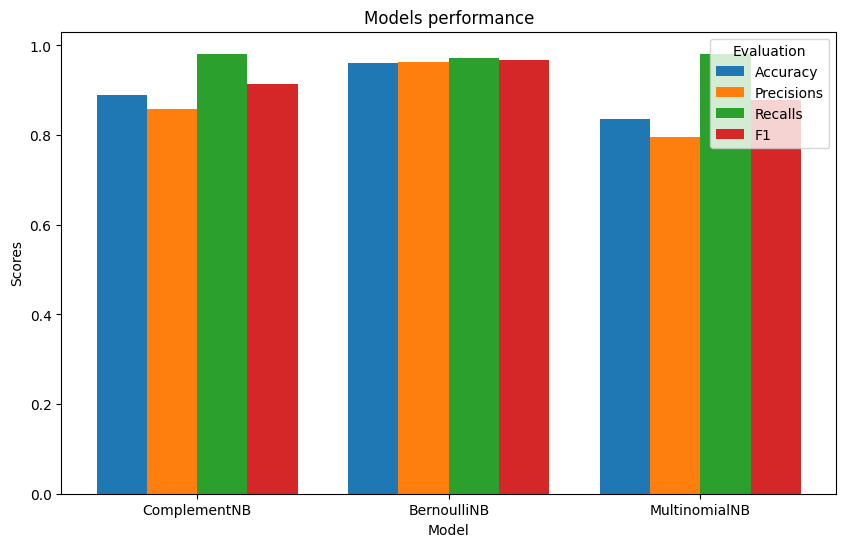

In [43]:
accuracies = []
precisions = []
recalls = []
f1 = []

# Convert feature with TF-ID
convert_feature = TfidfVectorizer()

X = convert_feature.fit_transform(loaded_dataset['Email Text'])
Y = loaded_dataset['Email Type']

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Calculate the performance
for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    accuracies.append(accuracy_score(y_test, pred))
    precisions.append(precision_score(y_test, pred))
    recalls.append(recall_score(y_test, pred))
    f1.append(f1_score(y_test, pred))

axis = np.arange(len(model_names))

plt.figure(figsize=(10, 6))
plt.bar(axis - 0.3, accuracies, 0.2, label = 'Accuracy') 
plt.bar(axis - 0.1, precisions, 0.2, label = 'Precisions')
plt.bar(axis + 0.1, recalls, 0.2, label = 'Recalls')
plt.bar(axis + 0.3, f1, 0.2, label = 'F1')

plt.xticks(axis, model_names) 
plt.xlabel("Model") 
plt.ylabel("Scores") 
plt.title("Models performance") 
plt.legend(title="Evaluation") 
plt.show() 

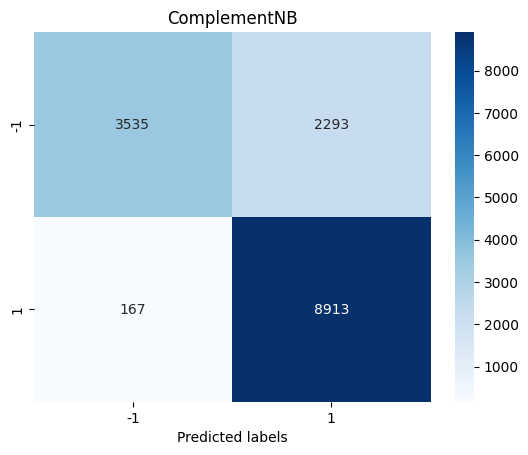

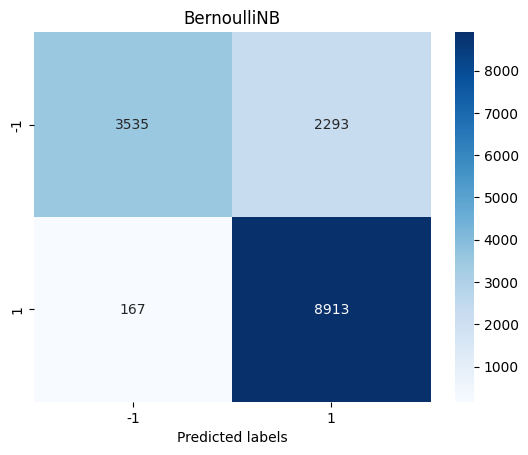

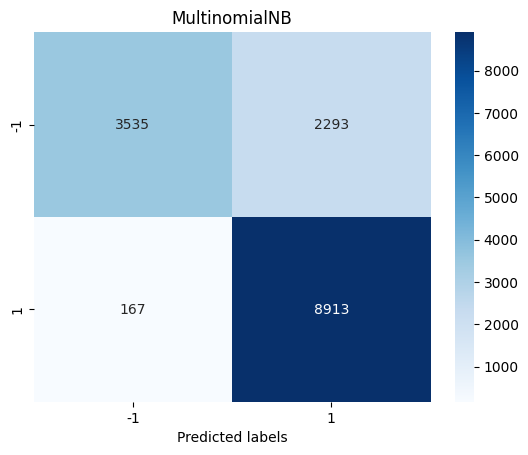

In [44]:
# Visualize the matrix
matrix = confusion_matrix(y_test, pred)

for model in models:
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted labels')
    plt.title(f'{type(model).__name__}')
    plt.show()

##### `Model result`

Predict a new text data with our model.

In [45]:
for model in models:
    convert_feature = TfidfVectorizer()

    X =  convert_feature.fit_transform(loaded_dataset['Email Text'])
    Y = loaded_dataset['Email Type']
    
    # Train the model
    model.fit(X, Y)

    # Predict new data
    new_data = ["Congratiolations! you have won a brand new car. Claim it now at https://honda.xyz/login."]

    pred = model.predict(convert_feature.transform(new_data))

    if pred[0] == -1:
       print(f'Predicted by {type(model).__name__}: Phishing text')
    else:
       print(f'Predicted by {type(model).__name__}: Safe text')

Predicted by ComplementNB: Phishing text
Predicted by BernoulliNB: Phishing text
Predicted by MultinomialNB: Phishing text


You can adjust its paramater or use a fine-tunning.